## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = argmax_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here(5 points)**   

##################################     
TODO: Gradient of $W_k= \frac{\partial loss}{\partial score}*\frac{\partial score}{\partial W_k}$,which has three cases: predict score index matches then x, ylabel score index matches then -x, o.w cases for 0, Gradient of $b = \frac{\partial loss}{\partial score}*\frac{\partial score}{\partial b}$, which also accordingly has three cases: +1,-1,0.
#################################
                              
                        

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

/home/minjie/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [3]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_train.shape)

print(type(y_train))



X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (105,)
<class 'numpy.ndarray'>


In [29]:
class MultiClsPLA(object):
    
    ## We recommend to absorb the bias into weight.  W = [w, b]
    
    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_tst = []
          
    def initial_weight(self, weight_dimension, num_cls):
        #print(weight_dimension)
        weight = np.random.normal(0, 0.01, size=(weight_dimension[0]-1,weight_dimension[1]))
        bias = np.random.normal(0,0.01,size=(1,weight_dimension[1]))
        weight = np.row_stack((weight,bias))
        #print(weight.shape)
        #########################################
        ##  ToDO: Initialize the weight with   ##
        ##  samll std and zero mean gaussian   ##
        #########################################
     
        return weight
        
    def data_preprocessing(self, data):
        #####################################
        ##  ToDO: Normlize the data        ##
        #####################################
        norm_data = (data - np.mean(data, 0)) / np.std(data, 0)
        return norm_data
    
    def train_step(self, X_train, y_train, shuffle_idx):
        #X_train = self.data_preprocessing(data=X_train)
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        
        train_acc = -1
        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        ##############################################
        #print(X_train.shape)
        #rint(y_train)
        #print(self.weight.shape)
        layer1 = np.dot(X_train,self.weight)
        
#         layer1[layer1>=0]=1
        #layer1[layer1<0]= 0
        #rint(layer1[0])
        y_pred = np.argmax(layer1,axis=1)
        #rint("sss:",y_pred)
        scores_pred = [layer1[i][y_pred[i]] for i in range(len(y_pred))]
        scores_y = [layer1[i][y_train[i]] for i in range(len(y_train))]
        loss_vector = np.array(scores_pred) - np.array(scores_y)
        loss = np.sum(loss_vector)
        #print("loss: ",loss)
        #rint(X_train.shape)
        DW_mat = np.zeros_like(self.weight)
        
        #Db_mat = np.zeros_like(self.weight.T)
        for i in range(len(y_train)):
            pred_index = y_pred[i]
            #print(pred_index)
            label_index = y_train[i]
            #print(Db_mat[0])
            #Db_mat[i][pred_index] = 1
            #Db_mat[i][label_index]= -1
            #print(DW_mat[:,pred_index])
            #print(X_train[i][:].T)
            DW_mat[:,pred_index] = X_train[i][:].T
            DW_mat[:,label_index] = - X_train[i][:].T
                
        DW = DW_mat 
        #Db = Db_mat
        
        self.weight = self.weight - self.lr * DW
        
        corr = np.sum(y_pred == y_train)
        train_acc = corr / len(y_train)
        
        
        
        return train_acc
        
    def test_step(self, X_test, y_test):
        
        
        #X_test = self.data_preprocessing(data=X_test)
        num_sample = X_test.shape[0]
        test_acc = -1
        W = self.weight
        layer1 = np.dot(X_test,W)
        #layer1[layer1<0] = 0
        y_pred = np.argmax(layer1,axis=1)
        
        corr = np.sum(y_pred == y_test) 
        
        test_acc = corr / len(y_test)
        
        
        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        #########################################
        
           
        return test_acc
        
    def train(self):
        
        #bias = np.random.normal(0,0.05,size=weight_dimension[0])
        #bias_mean = np.mean(bias,0)
        #bias_std = np.std(bias,0)
        #norm_bias = (bias - bias_mean) / bias_std
        
        #self.weight = np.column_stack((self.weight,bias))
        
        print("start")
        self.X_train = self.data_preprocessing(data=self.X_train)
        self.X_test = self.data_preprocessing(data=self.X_test)
        num_sample = self.X_train.shape[0]
        #print(self.X_train.shape)
        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
        ######################################################
        train_bias = np.ones(num_sample)
        test_bias = np.ones(len(self.X_test))
        self.X_train = np.column_stack((self.X_train,train_bias))
        self.X_test = np.column_stack((self.X_test,test_bias))
        #print(self.X_train.shape)
        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            #print("epoch:{}/{}".format(epoch,self.num_epoch))

            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)            
            tst_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'tst_acc:%.3f'%tst_acc)
    
    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show()

start
epoch: 0 traing_acc:0.143 tst_acc:0.178
epoch: 1 traing_acc:0.162 tst_acc:0.200
epoch: 2 traing_acc:0.190 tst_acc:0.289
epoch: 3 traing_acc:0.257 tst_acc:0.333
epoch: 4 traing_acc:0.362 tst_acc:0.511
epoch: 5 traing_acc:0.457 tst_acc:0.578
epoch: 6 traing_acc:0.619 tst_acc:0.600
epoch: 7 traing_acc:0.648 tst_acc:0.600
epoch: 8 traing_acc:0.648 tst_acc:0.600
epoch: 9 traing_acc:0.667 tst_acc:0.600
epoch: 10 traing_acc:0.676 tst_acc:0.622
epoch: 11 traing_acc:0.705 tst_acc:0.622
epoch: 12 traing_acc:0.752 tst_acc:0.622
epoch: 13 traing_acc:0.771 tst_acc:0.622
epoch: 14 traing_acc:0.781 tst_acc:0.689
epoch: 15 traing_acc:0.867 tst_acc:0.711
epoch: 16 traing_acc:0.857 tst_acc:0.711
epoch: 17 traing_acc:0.857 tst_acc:0.711
epoch: 18 traing_acc:0.848 tst_acc:0.756
epoch: 19 traing_acc:0.857 tst_acc:0.756
epoch: 20 traing_acc:0.857 tst_acc:0.756
epoch: 21 traing_acc:0.867 tst_acc:0.800
epoch: 22 traing_acc:0.867 tst_acc:0.844
epoch: 23 traing_acc:0.905 tst_acc:0.822
epoch: 24 traing_acc

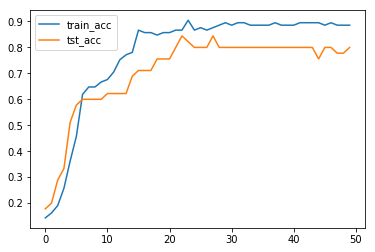

In [30]:
np.random.seed(0)
random.seed(0)
#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches
num_cls = 3
weight_dimension = (5,3)
num_epoch = 50
lr = 0.001
mulpla = MultiClsPLA(X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls)
mulpla.train()
mulpla.vis_acc_curve()